# Building classification models

## Importing libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the data

In [69]:
data=pd.read_csv('Titanic_Final.csv')  #dataset after eda is saved as Titanic_final

In [70]:
data=data.drop('Unnamed: 0',1)

In [71]:
data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.250000,1,0,1,0,1
1,1,38.0,1,0,32.204208,0,0,0,0,0
2,1,26.0,0,0,7.925000,0,0,1,0,1
3,1,35.0,1,0,53.100000,0,0,1,0,0
4,0,35.0,0,0,8.050000,1,0,1,0,1
5,0,28.0,0,0,8.458300,1,1,0,0,1
6,0,54.0,0,0,51.862500,1,0,1,0,0
7,0,6.0,1,1,21.075000,1,0,1,0,1
8,1,27.0,0,2,11.133300,0,0,1,0,1
9,1,14.0,1,0,30.070800,0,0,0,1,0


In [72]:
data.shape

(891, 10)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null int64
Q           891 non-null int64
S           891 non-null int64
2           891 non-null int64
3           891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [74]:
data.describe(include='all')

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.109989,0.349046,0.381594,18.632778,0.647587,0.086420,0.725028,0.206510,0.551066
std,0.486592,11.826281,0.538878,0.806057,12.349341,0.477990,0.281141,0.446751,0.405028,0.497665
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,26.368841,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,54.000000,2.000000,6.000000,53.100000,1.000000,1.000000,1.000000,1.000000,1.000000


### Defining X and Y
X is  independent variabe, Y is dependent variable,
Here Survived is Y

In [75]:
X=data.iloc[:,1:10].values
X.shape

(891, 9)

In [76]:
X

array([[22.,  1.,  0., ...,  1.,  0.,  1.],
       [38.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  0.,  0., ...,  1.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  1.,  0.,  1.],
       [26.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  0.,  1.]])

In [77]:
Y=data.iloc[:,0].values
Y.shape

(891,)

In [78]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Splitting the dataset

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.30, random_state=0)

In [80]:
X_train.shape

(623, 9)

In [81]:
X_test.shape

(268, 9)

In [82]:
Y_train.shape

(623,)

In [83]:
Y_test.shape

(268,)

### Scaling

In [84]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [85]:
np.set_printoptions(suppress=True)

In [86]:
X_train

array([[ 1.83802053, -0.64194441, -0.47299765, ...,  0.59774449,
        -0.51849697, -1.07851493],
       [ 1.66865405,  1.20105728, -0.47299765, ..., -1.67295561,
        -0.51849697, -1.07851493],
       [-1.97272533,  1.20105728,  1.93253327, ...,  0.59774449,
        -0.51849697,  0.92720089],
       ...,
       [-0.10969402, -0.64194441, -0.47299765, ..., -1.67295561,
        -0.51849697,  0.92720089],
       [ 0.56777191,  1.20105728, -0.47299765, ...,  0.59774449,
        -0.51849697,  0.92720089],
       [ 2.09207025,  1.20105728,  0.72976781, ...,  0.59774449,
         1.92865159, -1.07851493]])

# 1. Logistic Regression

### Building the model

In [87]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

D:\Users\SHK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
Y_pred=lr.predict(X_test)

In [89]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [90]:
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

### Model Evaluation using Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred)
print(confusion)

[[142  26]
 [ 27  73]]


Here 117 and 62 are accurate predictions and 22 and 22 are incorrect predictions

In [92]:
TN=confusion[0,0]   # True negative : we correctly predicted the actual negative data
FP=confusion[0,1]   # False positive : we incorrectly predicted the actual negative data as positive(type I Error)
FN=confusion[1,0]   # False negative : we incorrectly predicted the actual positive data as negative(type II Error)
TP=confusion[1,1]   # True positive : we correctly predicted the actual positive data

In [93]:
print(confusion)
print("TN: ",TN)
print("FP: ",FP)
print("FN: ",FN)
print("TP: ",TP)

[[142  26]
 [ 27  73]]
TN:  142
FP:  26
FN:  27
TP:  73


In [94]:
confusion_matrix = pd.DataFrame(confusion)
confusion_matrix.columns = ['Predicted not Survived', 'Predicted Survived']
confusion_matrix=confusion_matrix.rename(index={0: 'Actually not survived', 1: 'Actually survived'})
confusion_matrix

,Predicted not Survived,Predicted Survived
Actually not survived,142,26
Actually survived,27,73


### Evaluation metrics
Can calculate manually using consusion matrix as follows

In [95]:
#accuracy
acc=(TN+TP)/(TN+TP+FN+FP)
print("Accuracy: ",acc)

Accuracy:  0.8022388059701493


In [96]:
#classification error
err=(FP+FN)/(TN+TP+FN+FP)
print("Error: ",err)

Error:  0.19776119402985073


In [97]:
#True positive rate or recall
rec=TP/(TP+FN)
print("Recall: ",rec)

Recall:  0.73


In [98]:
#True negative rate or specificity
spec=TN/(TN+FP)
print("Specificity: ",spec)

Specificity:  0.8452380952380952


In [99]:
#False negative rate
fnr=FP/(TN+FP)
print("False negative rate: ",fnr)

False negative rate:  0.15476190476190477


In [100]:
#precision
p=TP/(TP+FP)
print("Precision: ",p)

Precision:  0.7373737373737373


All these together can be calculated as follows

In [101]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy=accuracy_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
f1=f1_score(Y_test,Y_pred)
roc_auc=roc_auc_score(Y_test,Y_pred)

print("Accuracy is: ",round(accuracy,2)*100)
print("F1 score is: ",round(f1,2)*100)
print("Precision is: ",round(precision,2)*100)
print("Recall is: ",round(recall,2)*100)
print("Roc_Auc is: ",round(roc_auc,2)*100)

Accuracy is:  80.0
F1 score is:  73.0
Precision is:  74.0
Recall is:  73.0
Roc_Auc is:  79.0


In [102]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.73      0.73       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



## Therefore accuracy obtained using logistic regression is around 80%

# 2. KNN

### Building the model

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
Y_pred_knn=knn.predict(X_test)

In [105]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [106]:
Y_pred_knn

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0], dtype=int64)

### Confusion matrix

In [107]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred_knn)
print(confusion)

[[135  33]
 [ 33  67]]


### Model evaluation metrics

In [108]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy=accuracy_score(Y_test,Y_pred_knn)
recall=recall_score(Y_test,Y_pred_knn)
precision=precision_score(Y_test,Y_pred_knn)
f1=f1_score(Y_test,Y_pred_knn)
roc_auc=roc_auc_score(Y_test,Y_pred_knn)

print("Accuracy is: ",round(accuracy,2)*100)
print("F1 score is: ",round(f1,2)*100)
print("Precision is: ",round(precision,2)*100)
print("Recall is: ",round(recall,2)*100)
print("Roc_Auc is: ",round(roc_auc,2)*100)

Accuracy is:  75.0
F1 score is:  67.0
Precision is:  67.0
Recall is:  67.0
Roc_Auc is:  74.0


#### Accuracy is 75% when default k is 5

In [109]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       168
           1       0.67      0.67      0.67       100

   micro avg       0.75      0.75      0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



### OR finding the best k value manually

In [110]:
error=[]
for i in range(1,60,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

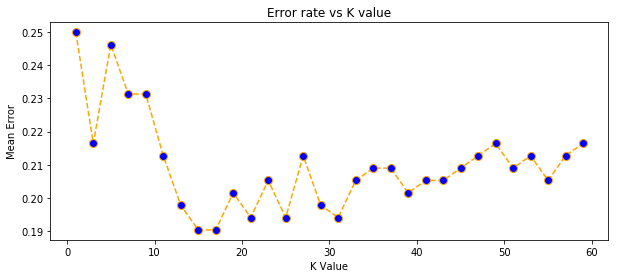

In [111]:
plt.figure(figsize=(10,4))
plt.plot(range(1,60,2), error, color='orange', linestyle='dashed', marker='o', markerfacecolor='blue',markersize=8)
plt.title('Error rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### From the above graph we can make out that error is least at k =17, so best k=17

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [113]:
Y_pred_knne=knn.predict(X_test)

### Confusion matrix

In [114]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred_knne)
print(confusion)

[[156  12]
 [ 39  61]]


### Model evaluation metrics

In [115]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy=accuracy_score(Y_test,Y_pred_knne)
recall=recall_score(Y_test,Y_pred_knne)
precision=precision_score(Y_test,Y_pred_knne)
f1=f1_score(Y_test,Y_pred_knne)
roc_auc=roc_auc_score(Y_test,Y_pred_knne)

print("Accuracy is: ",round(accuracy,2)*100)
print("F1 score is: ",round(f1,2)*100)
print("Precision is: ",round(precision,2)*100)
print("Recall is: ",round(recall,2)*100)
print("Roc_Auc is: ",round(roc_auc,2)*100)

Accuracy is:  81.0
F1 score is:  71.0
Precision is:  84.0
Recall is:  61.0
Roc_Auc is:  77.0


In [116]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_knne))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       168
           1       0.84      0.61      0.71       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.82      0.77      0.78       268
weighted avg       0.81      0.81      0.80       268



## Therefore accuracy obtained using KNN is around 81%

# 3. Decision Tree

### Building the model

In [117]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [118]:
Y_pred_dt = clf.predict(X_test)

In [119]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [120]:
Y_pred_dt

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

### Confusion matrix

In [121]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred_dt)
print(confusion)

[[142  26]
 [ 25  75]]


### Model evaluation metrics

In [122]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy=accuracy_score(Y_test,Y_pred_dt)
recall=recall_score(Y_test,Y_pred_dt)
precision=precision_score(Y_test,Y_pred_dt)
f1=f1_score(Y_test,Y_pred_dt)
roc_auc=roc_auc_score(Y_test,Y_pred_dt)

print("Accuracy is: ",round(accuracy,2)*100)
print("F1 score is: ",round(f1,2)*100)
print("Precision is: ",round(precision,2)*100)
print("Recall is: ",round(recall,2)*100)
print("Roc_Auc is: ",round(roc_auc,2)*100)

Accuracy is:  81.0
F1 score is:  75.0
Precision is:  74.0
Recall is:  75.0
Roc_Auc is:  80.0


In [123]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.74      0.75      0.75       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



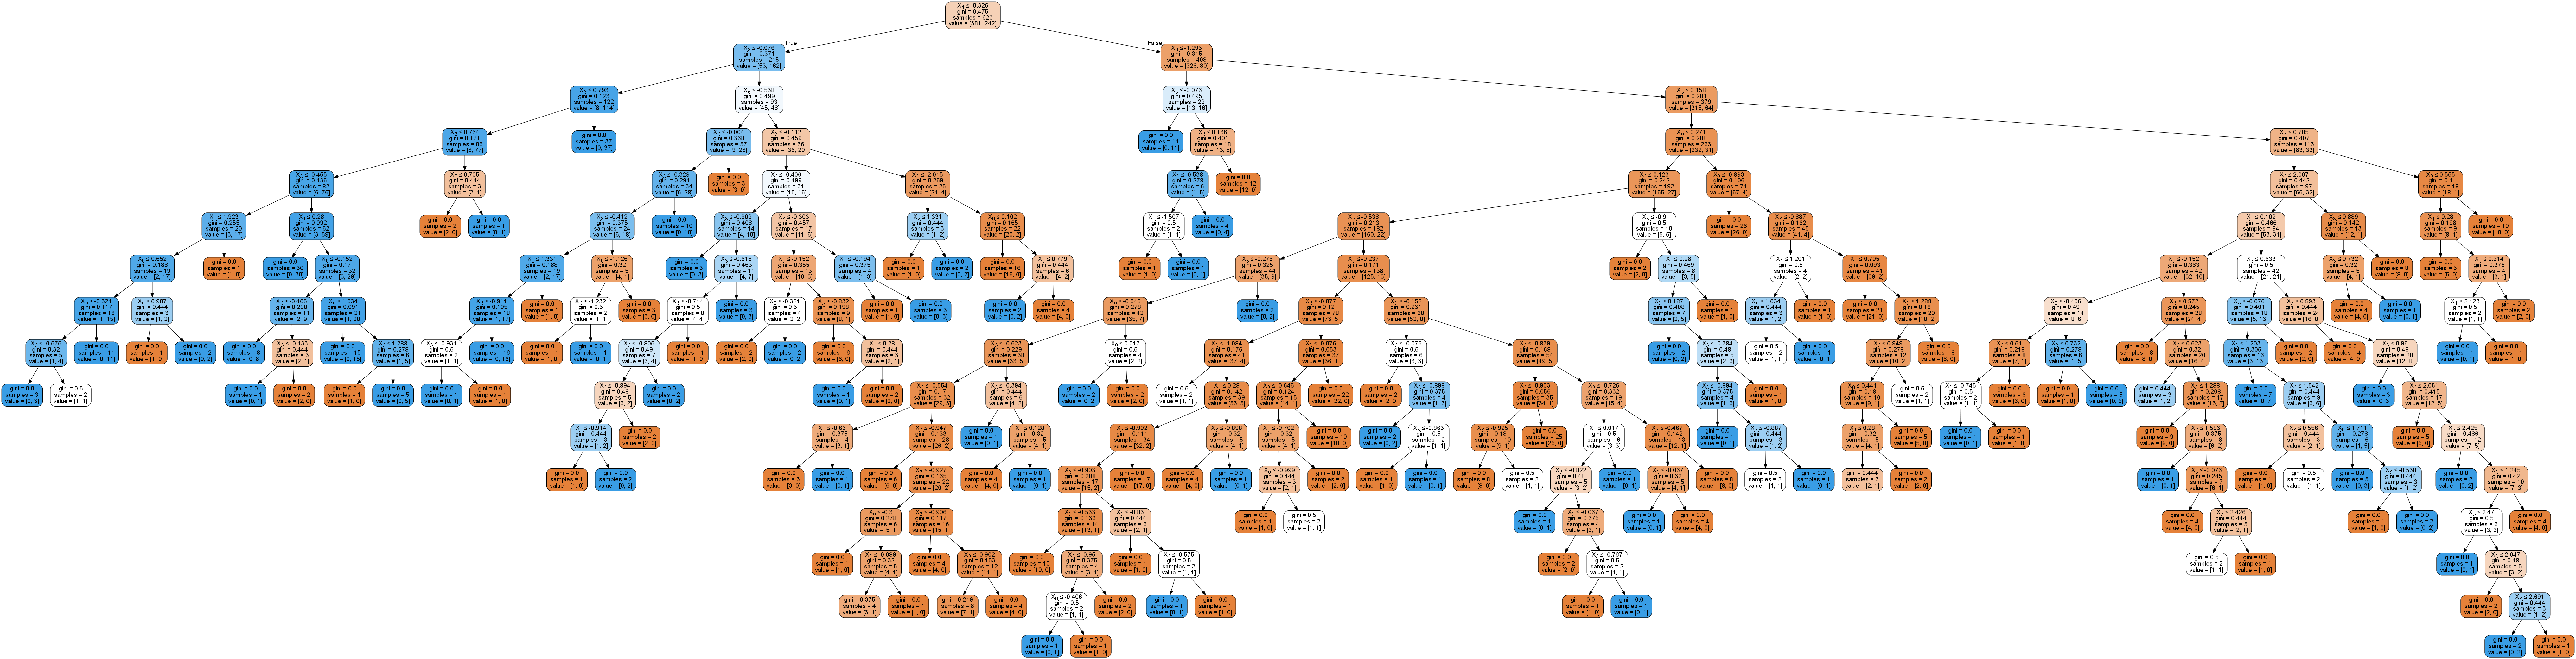

In [124]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=12000, height=12000)

## Therefore accuracy obtained using decision tree is around 81%

# 4. Random Forest

### Buliding model

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 40, n_jobs= 2, random_state= 0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [126]:
Y_pred_rf = rf.predict(X_test)

In [127]:
Y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [128]:
Y_pred_rf

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

### Confusion matrix

In [129]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred_rf)
print(confusion)

[[150  18]
 [ 26  74]]


### Model evaluation metrics

In [130]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy=accuracy_score(Y_test,Y_pred_rf)
recall=recall_score(Y_test,Y_pred_rf)
precision=precision_score(Y_test,Y_pred_rf)
f1=f1_score(Y_test,Y_pred_rf)
roc_auc=roc_auc_score(Y_test,Y_pred_rf)

print("Accuracy is: ",round(accuracy,2)*100)
print("F1 score is: ",round(f1,2)*100)
print("Precision is: ",round(precision,2)*100)
print("Recall is: ",round(recall,2)*100)
print("Roc_Auc is: ",round(roc_auc,2)*100)

Accuracy is:  84.0
F1 score is:  77.0
Precision is:  80.0
Recall is:  74.0
Roc_Auc is:  82.0


In [131]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.80      0.74      0.77       100

   micro avg       0.84      0.84      0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



## Therefore accuracy obtained using random forest is around 84%

# We can conclude that Random forest is the best classifier among the four for our titancic dataset as it gives the highest accuracy of 84%